In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from Farm_Evaluator_Vec import getTurbLoc, loadPowerCurve, binWindResourceData, preProcessing, getAEP, checkConstraints

In [ ]:
turb_coords   =  getTurbLoc(r'turbine_loc_test.csv')
power_curve   =  loadPowerCurve('power_curve.csv')
wind_inst_freq =  binWindResourceData(r'wind_data_2007.csv')
turb_rad = 50

In [ ]:
n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t = preProcessing(power_curve)

In [ ]:
# Problem parameter
min_lim = 50
max_lim = 3950
turb_count = 50
penalty = 0.05

In [ ]:
def gen_coord():
    x = round(random.uniform(min_lim, max_lim),2)
    y = round(random.uniform(min_lim, max_lim),2)
    return x,y

In [ ]:
def check_violation(turb1, turb2):
    return np.linalg.norm(turb1 - turb2) > 8*turb_rad

In [ ]:
def generate_turb_locations():
    arr = [gen_coord()]
    for i in range(turb_count-1):
        while True:
            new_cord = gen_coord()

            if all([check_violation(np.array(cord), np.array(new_cord)) for cord in arr]):
                arr.append(new_cord)
                break
    return arr

In [ ]:
def calculate_AEP(turb_coords):
    return getAEP(turb_rad, turb_coords, power_curve, wind_inst_freq, 
                  n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t)

In [ ]:
class TurbGroup:
    def __init__(self):
        self.turb_coords = np.array(generate_turb_locations())
        self.fitness = -1
        self.violation_count = 0
    
    def count_violation(self):
        for i,turb1 in enumerate(self.turb_coords):
            for turb2 in np.delete(self.turb_coords, i, axis=0):
                if  np.linalg.norm(turb1 - turb2) < 8*turb_rad:
                    self.violation_count += 1
                    
        
    def calculate_fitness(self):
        self.count_violation()
        fitness = calculate_AEP(self.turb_coords)
        fitness -= fitness*penalty*self.violation_count
        self.fitness = fitness


In [ ]:
# GA parameters
POP_SIZE = 50
GEN_COUNT = 100
TOURNAMENT_SIZE = 5
MUT_PROB = 0.15
XO_PROB = 0.75

In [ ]:
def ga():

    pop = init_pop(POP_SIZE)
    pop = fitness(pop)
    for agent in pop:
        plt.scatter(agent.turb_coords[:,0],agent.turb_coords[:,1])
    for generation in range(GEN_COUNT):    
        
        nextgen_pop = []
        for i in range(int(POP_SIZE/2)):
            parent1 = selection(pop)
            parent2 = selection(pop)
            offspring = crossover(parent1, parent2)
            nextgen_pop.append(mutation(offspring[0]))
            nextgen_pop.append(mutation(offspring[1]))
        pop = fitness(nextgen_pop)
        best = sorted(pop, key=lambda x: x.fitness, reverse=True)
        print("Best fit in Generation no {}: {}".format(generation, best[0].fitness))
    plt.scatter(best[0].turb_coords[:,0], best[0].turb_coords[:,1], c='black')
    return best[0]


In [ ]:
def init_pop(population_count):
    return [TurbGroup() for _ in range(population_count)]

In [ ]:
def fitness(population):
    for agent in population:
        agent.calculate_fitness()
    return population

In [ ]:
def selection(population):
    players = random.sample(population, TOURNAMENT_SIZE)
    sorted_players = sorted(players, key=lambda x: x.fitness, reverse=True)

    return sorted_players[0]

In [ ]:
def crossover(p1, p2):
    if random.random() < XO_PROB:
        xo_pt = random.randrange(turb_count)
        p1.turb_coords[:xo_pt],p2.turb_coords[:xo_pt] = p1.turb_coords[:xo_pt],p2.turb_coords[:xo_pt]

    return p1, p2

In [ ]:
def mutation(agent):
    if random.random() < MUT_PROB:
        return TurbGroup()
    else:
        return agent

Best fit in Generation no 0: 515.4995205688476
Best fit in Generation no 1: 515.4995205688476
Best fit in Generation no 2: 515.4995205688476
Best fit in Generation no 3: 515.4995205688476
Best fit in Generation no 4: 515.4995205688476
Best fit in Generation no 5: 515.4995205688476
Best fit in Generation no 6: 515.4995205688476
Best fit in Generation no 7: 515.4995205688476
Best fit in Generation no 8: 515.4995205688476
Best fit in Generation no 9: 515.4995205688476
Best fit in Generation no 10: 515.4995205688476
Best fit in Generation no 11: 515.4995205688476
Best fit in Generation no 12: 515.4995205688476
Best fit in Generation no 13: 515.4995205688476
Best fit in Generation no 14: 515.4995205688476
Best fit in Generation no 15: 515.4995205688476
Best fit in Generation no 16: 515.4995205688476
Best fit in Generation no 17: 515.4995205688476
Best fit in Generation no 18: 515.4995205688476
Best fit in Generation no 19: 515.7595028686524
Best fit in Generation no 20: 515.7595028686524
Be

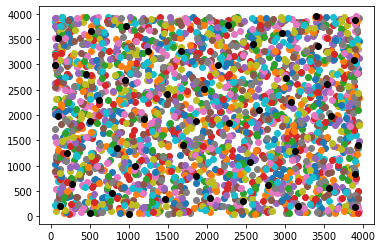

In [ ]:
# best_fit is an instance of the class TurbGroup
# you can get the location using the attribute turb_coords
# eg: best_fit.turb_coords
best_fit = ga()

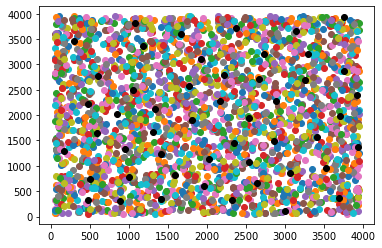

In [ ]:
## Plotting the search space
count = 50
for _ in range(count):
    locs = np.array(generate_turb_locations())
    plt.scatter(locs[:,0],locs[:,1])
plt.scatter(turb_coords[:,0],turb_coords[:,1], c='black')